In [1]:
import pandas as pd                  
import numpy as np      
import matplotlib.pyplot as plt      
import seaborn as sns     
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r'D:\Teks 2024\smartphones.csv')

In [3]:
data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [4]:
data.shape

(980, 26)

In [5]:
data

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


In [7]:
data.drop(columns=['model'],inplace=True)

In [8]:
data.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [9]:
brand_counts = data.groupby('brand_name').size()
print(brand_counts)

brand_name
apple         46
asus           7
blackview      1
blu            1
cat            1
cola           1
doogee         2
duoqin         1
gionee         3
google        14
honor         13
huawei        16
ikall          3
infinix       29
iqoo          32
itel          10
jio            4
lava           4
leeco          1
leitz          1
lenovo         2
letv           3
lg             3
lyf            2
micromax       3
motorola      52
nokia         13
nothing        5
nubia          6
oneplus       42
oppo          88
oukitel        3
poco          41
realme        97
redmi          3
royole         2
samsung      132
sharp          1
sony           9
tcl            1
tecno         33
tesla          1
vertu          1
vivo         111
xiaomi       134
zte            2
dtype: int64


In [10]:
num_null_columns = data.columns[data.isnull().any()]
print(num_null_columns)

Index(['rating', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging', 'num_front_cameras', 'os',
       'primary_camera_front', 'extended_upto'],
      dtype='object')


In [11]:
null_columns = data.columns[data.isnull().any()]
print(null_columns)

Index(['rating', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging', 'num_front_cameras', 'os',
       'primary_camera_front', 'extended_upto'],
      dtype='object')


In [12]:
data['rating'].fillna(data['rating'].median(),inplace=True)
data['processor_brand'].fillna(data['processor_brand'].mode(),inplace=True)
data['os'].fillna(data['os'].mode(),inplace=True)
data['num_cores'].fillna(data['num_cores'].median(),inplace=True)
data['processor_speed'].fillna(data['processor_speed'].median(),inplace=True)
data['battery_capacity'].fillna(data['battery_capacity'].median(),inplace=True)
data['fast_charging'].fillna(data['fast_charging'].median(),inplace=True)
data['num_front_cameras'].fillna(data['num_front_cameras'].median(),inplace=True)
data['primary_camera_front'].fillna(data['primary_camera_front'].median(),inplace=True)
data['extended_upto'].fillna(data['extended_upto'].median(),inplace=True)

In [13]:
X = data.drop(columns=['price'])   
y = data['price'] 

Our target variable is price as we want to predict the price of the smartphones based on their features. Also can use rating depending on the target variable relevant to the user specification but here we are focusing on the price criteria. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['brand_name'] = le.fit_transform(X_train['brand_name'])

In [15]:
X_train.dtypes

brand_name                     int32
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
resolution_width               int64
resolution_height              int64
dtype: object

In [16]:
X_train = pd.get_dummies(X_train)
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


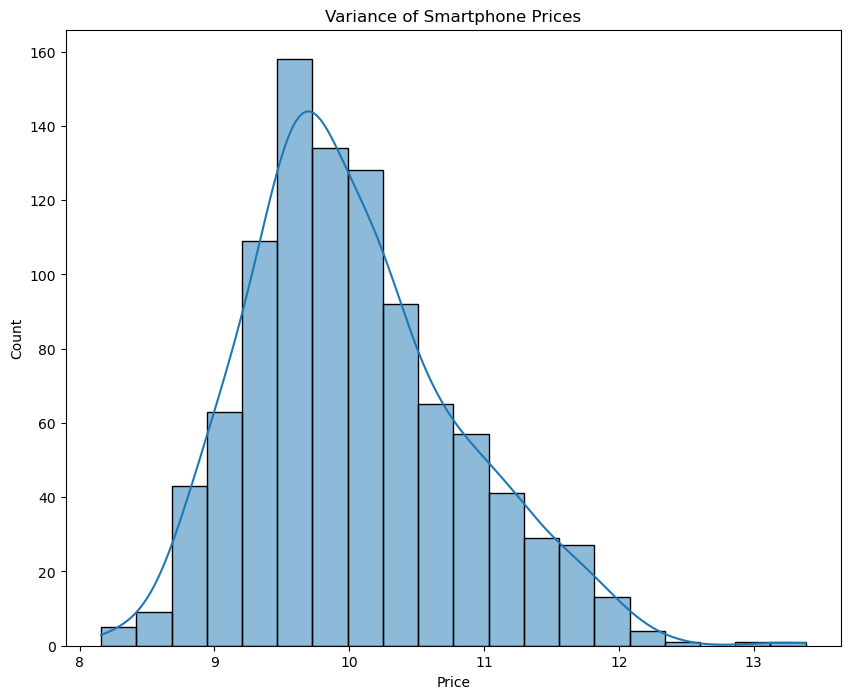

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(np.log(data['price']),bins=20, kde=True)
plt.title('Variance of Smartphone Prices')
plt.xlabel('Price')
plt.show()

We used the KDE(Kernel Density Estimate) line to show the overall shape of the distribution and 
from this plot we can infer that there is more focus on the left side and hence this is right skewed.


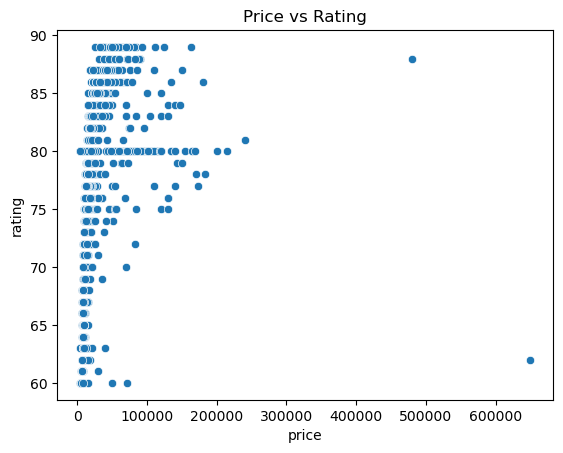

In [19]:
sns.scatterplot(x=data['price'], y=data['rating'])
plt.title('Price vs Rating')
plt.xlabel('price')
plt.ylabel('rating')
plt.show()

Higher prices do not have higher ratings.

BOXPLOT

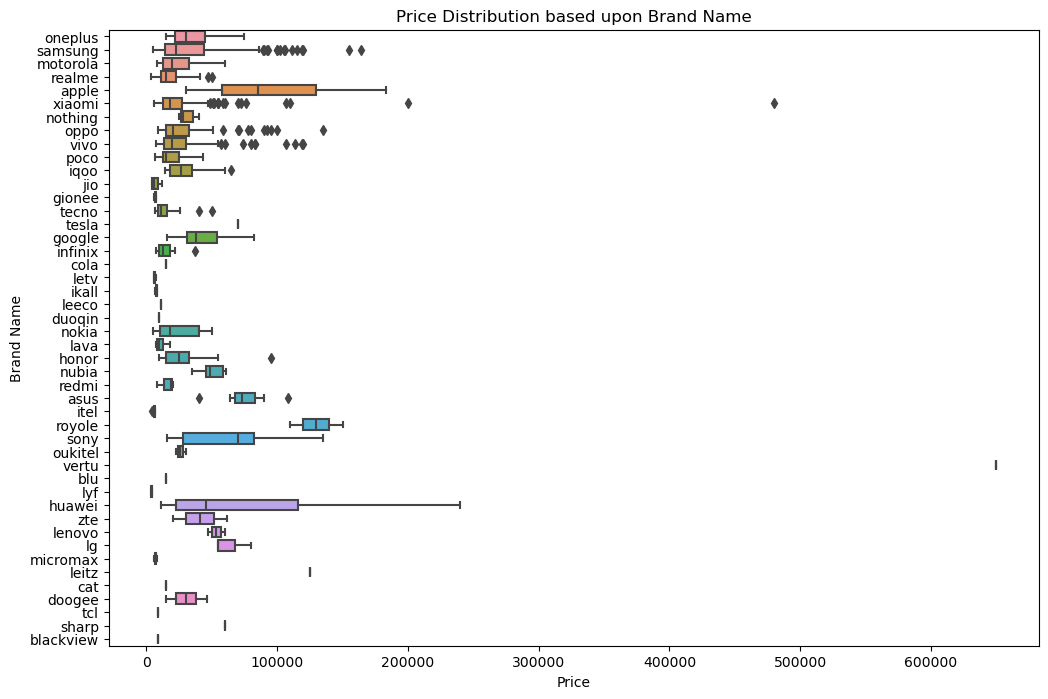

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='price', y='brand_name')
plt.title("Price Distribution based upon Brand Name")
plt.xlabel("Price")
plt.ylabel("Brand Name")
plt.show()

Box plot to show price distribution across different brands.

SCATTERPLOT-2

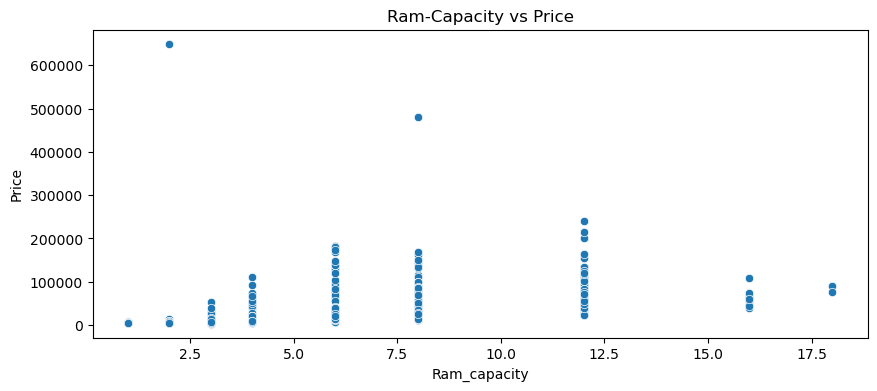

In [21]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=data, x='ram_capacity', y='price')
plt.title("Ram-Capacity vs Price")
plt.xlabel("Ram_capacity")
plt.ylabel("Price")
plt.show()

Scatter plot to show the effect of RAM on price.

In [22]:
print(data.columns)

Index(['brand_name', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')


VIOLIN PLOT

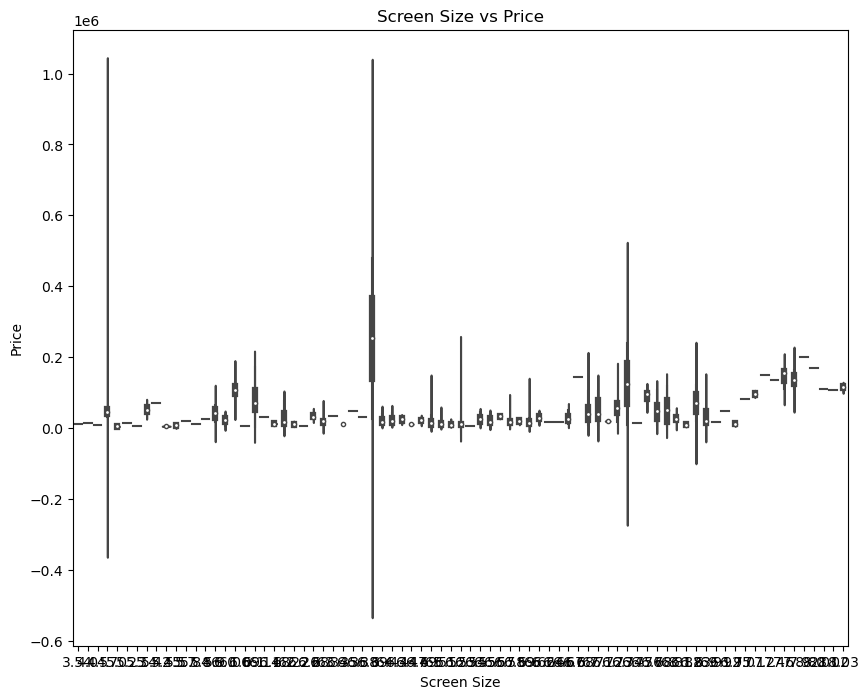

In [23]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x='screen_size', y='price')
plt.title("Screen Size vs Price")
plt.xlabel("Screen Size")
plt.ylabel("Price")
plt.show()

LINE PLOT

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


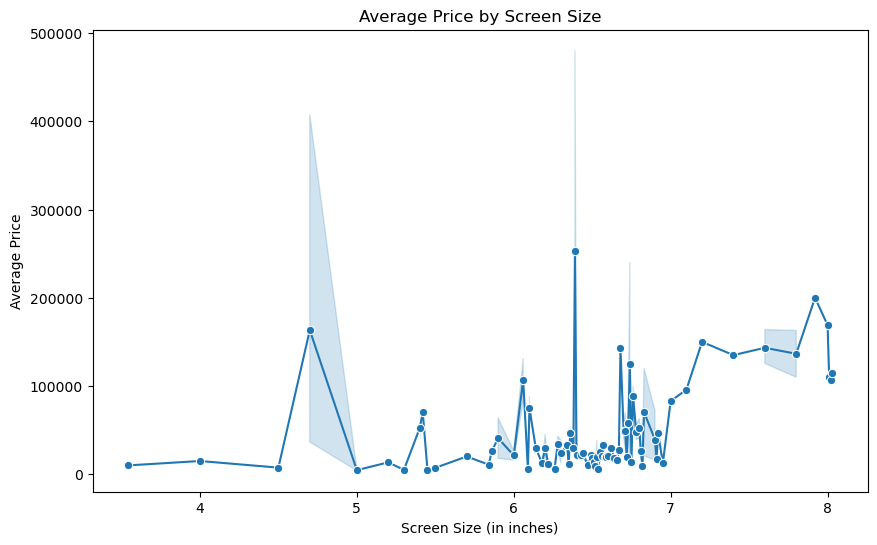

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='screen_size', y='price',marker='o')
plt.title("Average Price by Screen Size")
plt.xlabel("Screen Size (in inches)")
plt.ylabel("Average Price")
plt.show()

SCATTER PLOT-3

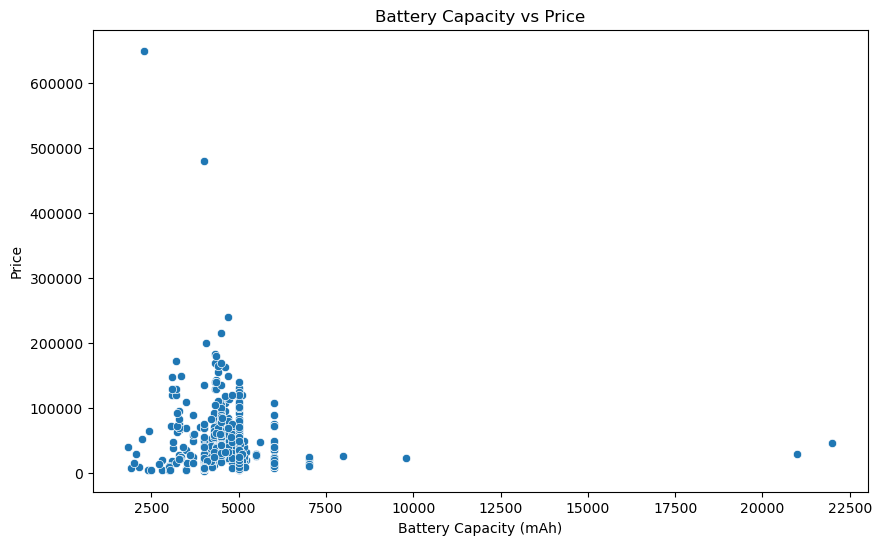

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='battery_capacity', y='price')
plt.title("Battery Capacity vs Price")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Price")
plt.show()

HEATMAP(CORRELATION)

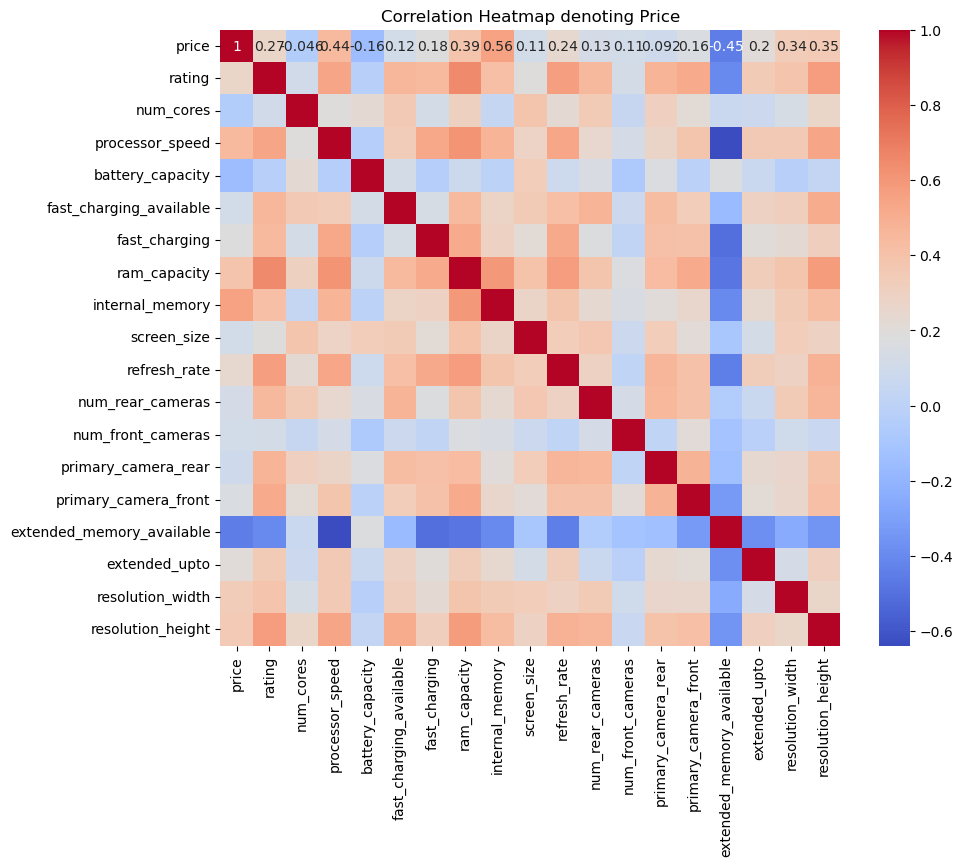

In [26]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap denoting Price")
plt.show()

Text(0, 0.5, 'Frequency')

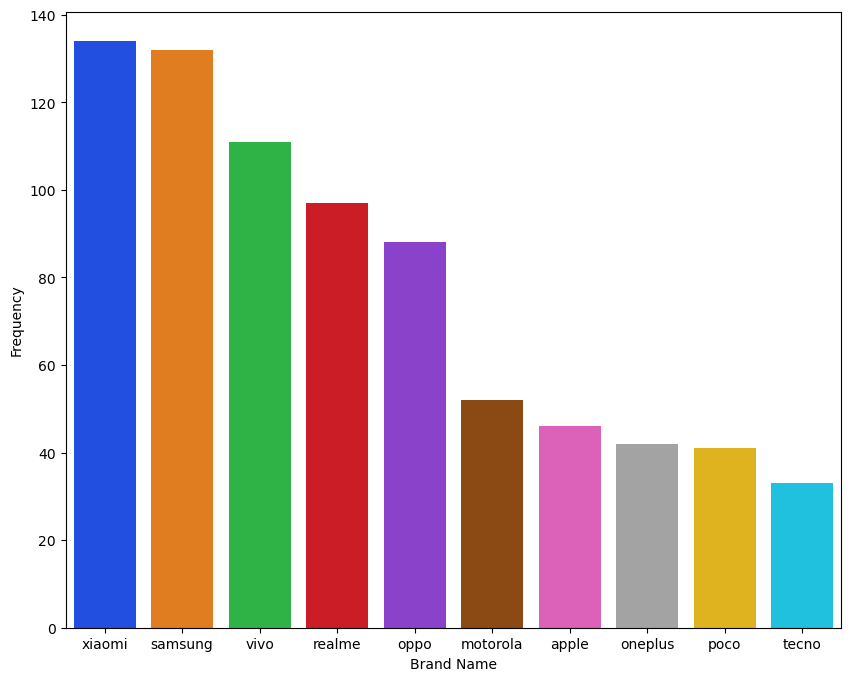

In [27]:
top_10_brands = data['brand_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='bright')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')

In [28]:
brand_avg_price = data.groupby('brand_name')['price'].mean()

most_expensive_brand = brand_avg_price.idxmax()
least_expensive_brand = brand_avg_price.idxmin()

print("Most Expensive brand :",most_expensive_brand)
print("Least expensive brand:",least_expensive_brand)

Most Expensive brand : vertu
Least expensive brand: lyf


MODEL BUILDING

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
X = data[['ram_capacity', 'internal_memory', 'battery_capacity', 'processor_speed','rating','screen_size']]  
y = data['price']  

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 12050.558979964535


In [36]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-Squared:",r2)

Mean Squared Error: 394117055.2402974
R-Squared: 0.5885347144892032


In [37]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 19852.381601215944


RANDOM FOREST REGRESSOR

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
X = data.drop(columns=['price'])   
y = data['price'] 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [42]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join="left", axis=1)

X_train_encoded = X_train_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)

In [43]:
random_forest_regressor = RandomForestRegressor()

In [44]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = random_forest_regressor.predict(X_test_encoded)

In [46]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 6712.692348639456


In [47]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-Squared:",r2)

Mean Squared Error: 192487103.14140028
R-Squared: 0.7990400065205696


In [48]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 13873.972147204286


COMPARISON OF KEY-METRICS

In [49]:
model_1 = LinearRegression()
model_1.fit(X_train_encoded, y_train)

model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [50]:
y_pred_1 = model_1.predict(X_test_encoded)
y_pred_2 = model_2.predict(X_test_encoded)

mae_1 = mean_absolute_error(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)
rmse_1 = mean_squared_error(y_test, y_pred_1, squared=False)
r2_1 = r2_score(y_test, y_pred_1)

mae_2 = mean_absolute_error(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = mean_squared_error(y_test, y_pred_2, squared=False)
r2_2 = r2_score(y_test, y_pred_2)

In [51]:
print("Model-1 Performance :")
print("MAE:", mae_1, "MSE:", mse_1, "RMSE:", rmse_1, "R²:", r2_1)
print("Model-2 Performance :")
print("MAE:", mae_2, "MSE:", mse_2, "RMSE:", rmse_2, "R²:", r2_2)

if(r2_1>r2_2):
      print("Model 1's performance is better depending upon R^2 value")
else :
      print("Model 2's performance is better depending upon R^2 value")

Model-1 Performance :
MAE: 10494.239346656264 MSE: 239963744.49028012 RMSE: 15490.76319908997 R²: 0.749473540091453
Model-2 Performance :
MAE: 6712.692348639456 MSE: 192487103.14140028 RMSE: 13873.972147204286 R²: 0.7990400065205696
Model 2's performance is better depending upon R^2 value


DECISION TREE REGRESSOR

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
model = DecisionTreeRegressor()

In [54]:
model.fit(X_train_encoded, y_train)

DecisionTreeRegressor()

In [55]:
y_pred = model.predict(X_test_encoded)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 10830.941326530612


In [57]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-Squared:",r2)

Mean Squared Error: 1255609170.8329082
R-Squared: -0.31087852986148157


In [58]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 35434.575922859694


GRADIENT BOOSTING

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
model = GradientBoostingRegressor()

In [61]:
model.fit(X_train_encoded, y_train)

GradientBoostingRegressor()

In [62]:
y_pred = model.predict(X_test_encoded)

In [63]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error:",mae)

Mean absolute Error: 7239.070611708898


In [64]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-Squared:",r2)

Mean Squared Error: 197344677.5736815
R-Squared: 0.7939686115527729


In [65]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 14047.942111700258


COMPARISON METRICS - 2

In [66]:
model_3 = DecisionTreeRegressor()
model_3.fit(X_train_encoded, y_train)

model_4 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_4.fit(X_train_encoded, y_train)

GradientBoostingRegressor(random_state=42)

In [67]:
y_pred_3 = model_3.predict(X_test_encoded)
y_pred_4 = model_4.predict(X_test_encoded)

mae_3 = mean_absolute_error(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = mean_squared_error(y_test, y_pred_3, squared=False)
r2_3 = r2_score(y_test, y_pred_3)

mae_4 = mean_absolute_error(y_test, y_pred_4)
mse_4 = mean_squared_error(y_test, y_pred_4)
rmse_4 = mean_squared_error(y_test, y_pred_4, squared=False)
r2_4 = r2_score(y_test, y_pred_4)

In [68]:
print("Model-3 Performance :")
print("MAE:", mae_3, "MSE:", mse_3, "RMSE:", rmse_3, "R²:", r2_3)
print("Model-4 Performance :")
print("MAE:", mae_4, "MSE:", mse_4, "RMSE:", rmse_4, "R²:", r2_4)

if(r2_3>r2_4):
      print("Model 3's performance is better depending upon R^2 value")
else :
      print("Model 4's performance is better depending upon R^2 value")

Model-3 Performance :
MAE: 10040.045918367347 MSE: 1150018965.2704082 RMSE: 33911.929542130274 R²: -0.20064045845290512
Model-4 Performance :
MAE: 7303.705859932637 MSE: 201656872.91906837 RMSE: 14200.594104440432 R²: 0.7894666021487746
Model 4's performance is better depending upon R^2 value


COMPARISON OF ALL FOUR MODELS

In [69]:
models = ['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'Gradient Boosting']

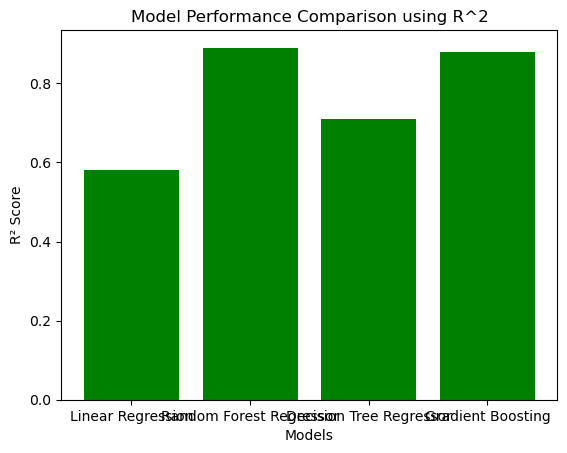

In [70]:
r2_scores = [0.58, 0.89, 0.71, 0.88]  

plt.bar(models, r2_scores, color ='green')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison using R^2')
plt.show()

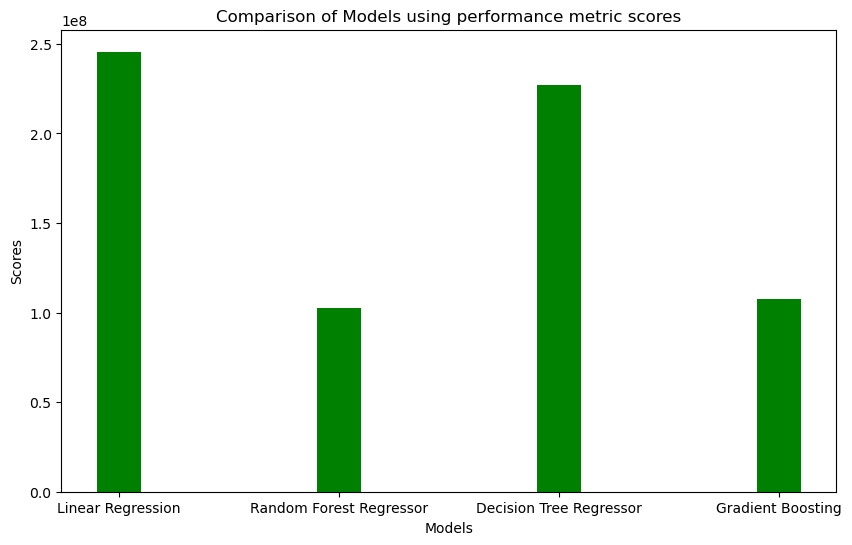

In [71]:
mae_scores = [10758.01, 5547.50, 8264.69, 6370.08]  
mse_scores = [245628722.43, 102699665.01, 226934366.47, 107509164.11]  
rmse_scores = np.sqrt(mse_scores) 
r2_scores = [0.58, 0.89, 0.71, 0.88]  

plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color='blue', label='MAE', width=0.2, align='center')
plt.bar(models, mse_scores, color='green', label='MSE', width=0.2, align='center')
plt.bar(models, rmse_scores, color='red', label='RMSE', width=0.2, align='center')
plt.bar(models, r2_scores, color='orange', label='R²', width=0.2, align='center')


plt.title('Comparison of Models using performance metric scores')
plt.xlabel('Models')
plt.ylabel('Scores')


plt.show()

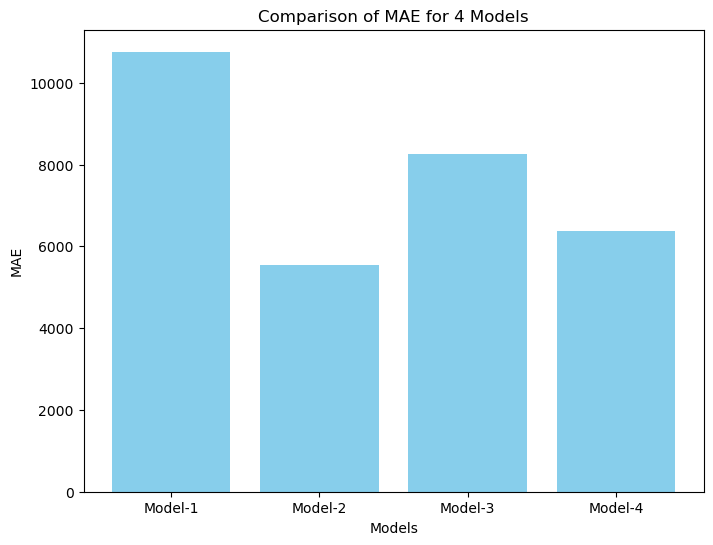

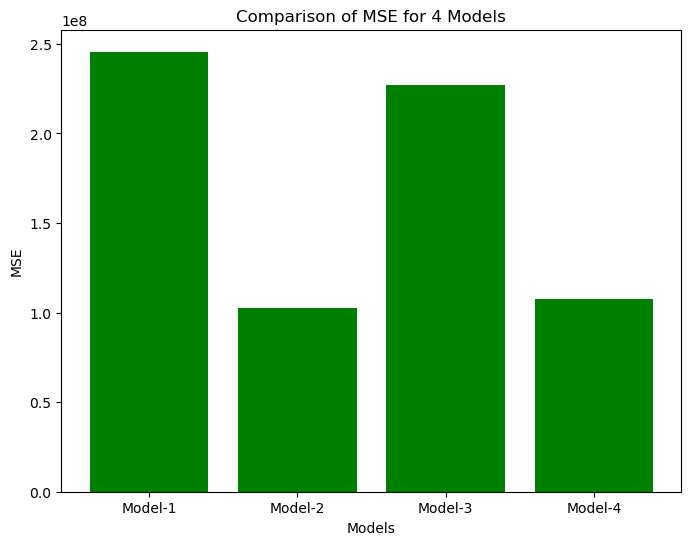

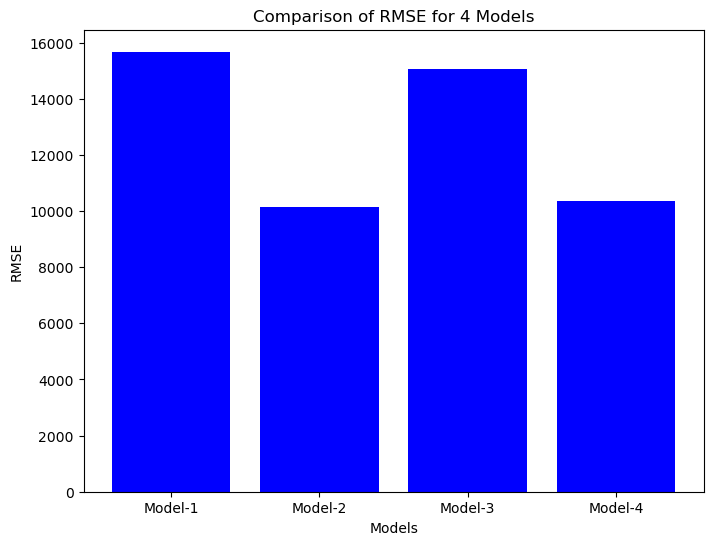

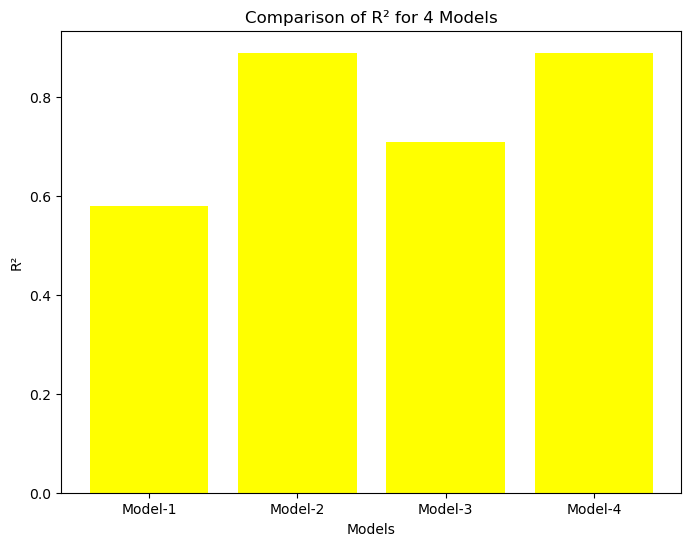

In [72]:
models = ['Model-1', 'Model-2', 'Model-3', 'Model-4']
mae = [10758.01, 5547.50, 8264.69, 6370.08]
mse = [245628722.43, 102699665.01, 226934366.47, 107509164.11]
rmse = [15672.55, 10134.08, 15064.34, 10368.66]
r2 = [0.58, 0.89, 0.71, 0.89]

plt.figure(figsize=(8, 6))
plt.bar(models, mae, color='skyblue')
plt.title('Comparison of MAE for 4 Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(models, mse, color='green')
plt.title('Comparison of MSE for 4 Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(models, rmse, color='blue')
plt.title('Comparison of RMSE for 4 Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(models, r2, color='yellow')
plt.title('Comparison of R² for 4 Models')
plt.xlabel('Models')
plt.ylabel('R²')
plt.show()

After performing all four regression models on the given dataset(smartphones), random forest regressor has more r^2 score when compared to others
and in terms of Mean Absolute Error(MAE) Linear Regression is relatively higher. Best model is model-2(RandomForestRegressor) 
as it has lesser mae,mse,rmse values and higher r^2 values. Model-2 has the overall best performance based on MAE, MSE, RMSE, and R^2.
The lower values indicates that the model's predicted values are closer to the actual ones, but lower MAE,MSE,RMSE and higher R^2 is the standard 
observation in regression analysis and model building. 

In the given dataset, the parameters which are having higher effect on the smartphone prices are given below :
  ->>>>>>Brand Name
  ->>>>>>Processor Brand
  ->>>>>>RAM Capacity
  ->>>>>>Screen Size
  ->>>>>>Battery Capacity
  ->>>>>>Camera Quality
  ->>>>>>Network(5G etc..)
  ->>>>>>Operating System
  ->>>>>>IR Blaster : A device that transmits infrared signals, to control other electronic devices and home appliances.

Most Expensive brand : vertu


Least expensive brand: lyf

In [73]:
model_3.feature_importances_

array([8.24946856e-03, 8.19723121e-04, 1.20288295e-03, 1.77543599e-04,
       3.42375359e-06, 4.76614706e-02, 1.44675393e-01, 1.03283429e-04,
       6.65038753e-03, 1.02214059e-02, 2.37091376e-01, 3.84544423e-03,
       2.91958736e-03, 1.57443659e-02, 1.80550873e-04, 1.28996155e-03,
       1.69753825e-02, 9.39477440e-03, 6.89861355e-05, 8.06514835e-02,
       1.00906167e-01, 1.50362438e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96727521e-07, 3.72974739e-05,
       0.00000000e+00, 0.00000000e+00, 1.42510609e-03, 5.29026731e-07,
       0.00000000e+00, 0.00000000e+00, 1.61451464e-05, 7.08997245e-05,
       0.00000000e+00, 7.71099934e-08, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.87375193e-04,
       0.00000000e+00, 1.16722162e-06, 1.40370918e-04, 0.00000000e+00,
       4.62273310e-05, 0.00000000e+00, 1.46706826e-05, 2.11164415e-04,
       0.00000000e+00, 1.14637591e-05, 5.65356437e-05, 0.00000000e+00,
      

In [74]:
model_3.feature_names_in_

array(['rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'num_cores',
       'processor_speed', 'battery_capacity', 'fast_charging_available',
       'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
       'refresh_rate', 'num_rear_cameras', 'num_front_cameras',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto', 'resolution_width',
       'resolution_height', 'brand_name_apple', 'brand_name_asus',
       'brand_name_blackview', 'brand_name_blu', 'brand_name_cat',
       'brand_name_cola', 'brand_name_doogee', 'brand_name_duoqin',
       'brand_name_gionee', 'brand_name_google', 'brand_name_honor',
       'brand_name_huawei', 'brand_name_ikall', 'brand_name_infinix',
       'brand_name_iqoo', 'brand_name_itel', 'brand_name_jio',
       'brand_name_lava', 'brand_name_leeco', 'brand_name_leitz',
       'brand_name_lenovo', 'brand_name_letv', 'brand_name_lg',
       'brand_name_lyf', 'brand_name_micromax', 'brand_name

In [75]:
feat_importances = pd.DataFrame(model_3.feature_importances_,index=model_3.feature_names_in_)

In [76]:
feat_importances.sort_values(by=0,ascending=False).head(10)

,0
brand_name_vertu,0.284321
internal_memory,0.237091
battery_capacity,0.144675
resolution_height,0.100906
resolution_width,0.080651
processor_speed,0.047661
primary_camera_front,0.016975
num_rear_cameras,0.015744
os_android,0.011645
ram_capacity,0.010221


Based upon the above inferences, we can observe that brand name ->(vertu) has highest importance as Vertu is the expensive brand out of all brands 
and next are the ->>>>>>Internal Memory, battery capacity, resolution height/width and processor speed. With less than 1%, front camera(primary),
rear cameras and OS, RAM capacity have the least importance or effect on the prices of smartphone.

